In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [102]:
df = pd.read_csv("health.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [103]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [104]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

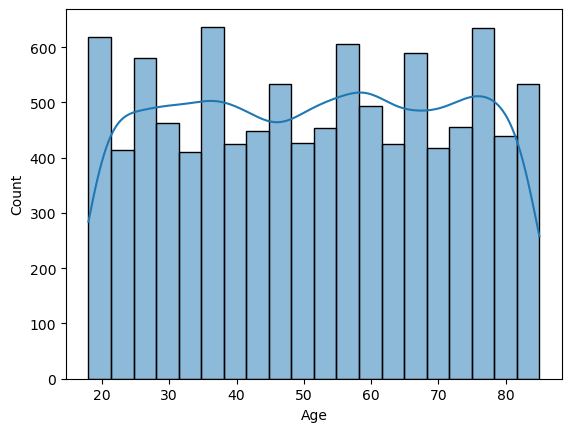

In [106]:
sns.histplot(df['Age'], bins=20, kde=True)

<Axes: xlabel='Admission Type', ylabel='Billing Amount'>

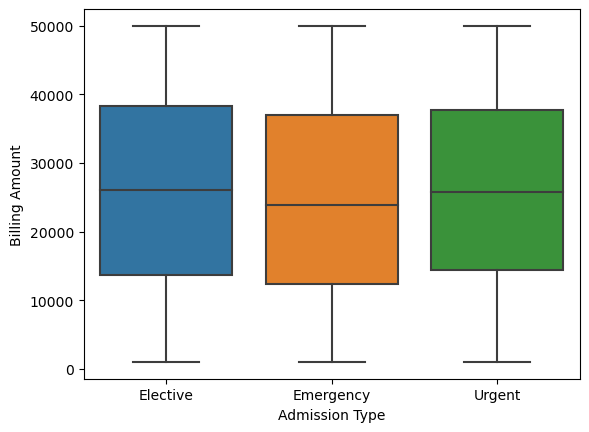

In [107]:
sns.boxplot(x='Admission Type', y='Billing Amount', data=df)

In [108]:
df = df[[ 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']]
df

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results
0,81,Female,O-,Diabetes,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,Urgent,Paracetamol,Normal
...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,Elective,Ibuprofen,Abnormal
9996,47,Female,AB+,Arthritis,Emergency,Ibuprofen,Normal
9997,54,Male,B-,Arthritis,Elective,Ibuprofen,Normal
9998,84,Male,A+,Arthritis,Urgent,Penicillin,Normal


In [110]:
lc = LabelEncoder()
for col in df.columns:
    if col!='Age':
        df[col]=lc.fit_transform(df[col])
df

C:\Users\lenov\AppData\Local\Temp\ipykernel_8548\531155296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=lc.fit_transform(df[col])
C:\Users\lenov\AppData\Local\Temp\ipykernel_8548\531155296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=lc.fit_transform(df[col])
C:\Users\lenov\AppData\Local\Temp\ipykernel_8548\531155296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results
0,81,0,7,3,0,0,1
1,35,1,6,1,1,2,2
2,61,1,5,5,1,2,2
3,49,1,5,1,2,4,0
4,51,1,7,0,2,3,2
...,...,...,...,...,...,...,...
9995,83,1,0,5,0,1,0
9996,47,0,2,0,1,1,2
9997,54,1,5,0,0,1,2
9998,84,1,0,0,2,4,2


In [113]:
X = df.drop(['Test Results'],axis=1)
y = df['Test Results']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [114]:
X_train.shape, y_test.shape

((8000, 6), (2000,))

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.325